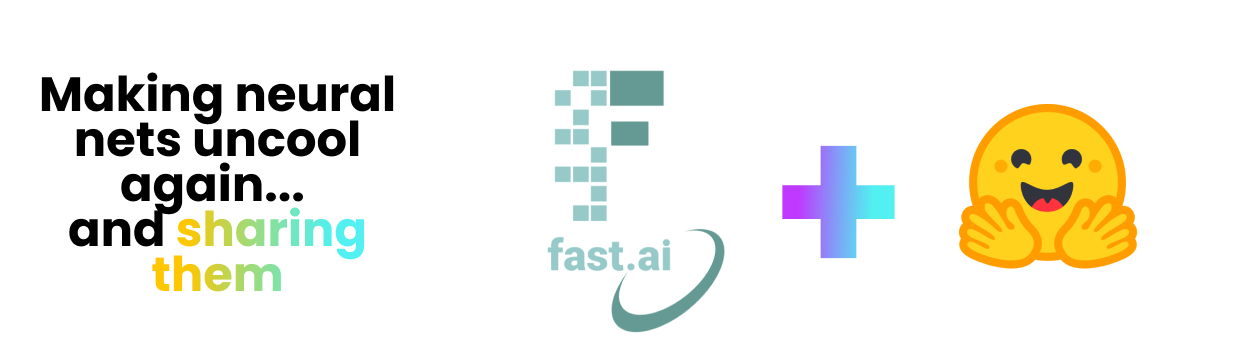

Few have done as much as the [fast.ai](https://www.fast.ai/) ecosystem to make Deep Learning accessible. Our mission at Hugging Face is to democratize good Machine Learning. Let's make exclusivity in access to Machine Learning, including [pre-trained models](https://huggingface.co/models), a thing of the past and let's push this amazing field even further.

fastai is an [open-source Deep Learning library](https://github.com/fastai/fastai) that leverages PyTorch and Python to provide high-level components to train fast and accurate neural networks with state-of-the-art outputs on text, vision, and tabular data. However, fast.ai, the company, is more than just a library; it has grown into a thriving ecosystem of open source contributors and people learning about neural networks. As some examples, check out their [book](https://github.com/fastai/fastbook) and [courses](https://course.fast.ai/). Join the fast.ai [Discord](https://discord.com/invite/YKrxeNn) and [forums](https://forums.fast.ai/). It is a guarantee that you will learn by being part of their community!

Because of all this, and more (the writer of this post started his journey thanks to the fast.ai course), we are proud to announce that fastai practitioners can now share and upload models to Hugging Face Hub with a single line of Python.

 👉 In this post, we will introduce the integration between fastai and the Hub.

We want to thank the fast.ai community, notably [Jeremy Howard](https://twitter.com/jeremyphoward), [Wayde Gilliam](https://twitter.com/waydegilliam), and [Zach Mueller](https://twitter.com/TheZachMueller) for their feedback 🤗. This blog is heavily inspired by the [Hugging Face Hub section](https://docs.fast.ai/huggingface.html) in the fastai docs.

## Why share to the Hub?

The Hub is a central platform where anyone can share and explore models, datasets, and ML demos. It has the most extensive collection of Open Source models, datasets, and demos.

Sharing on the Hub amplifies the impact of your fastai models by making them available for others to download and explore. You can also use transfer learning with fastai models; load someone else's model as the basis for your task.

Anyone can access all the fastai models in the Hub by filtering the [hf.co/models](https://huggingface.co/models?library=fastai&sort=downloads) webpage by the fastai library, as in the image below.


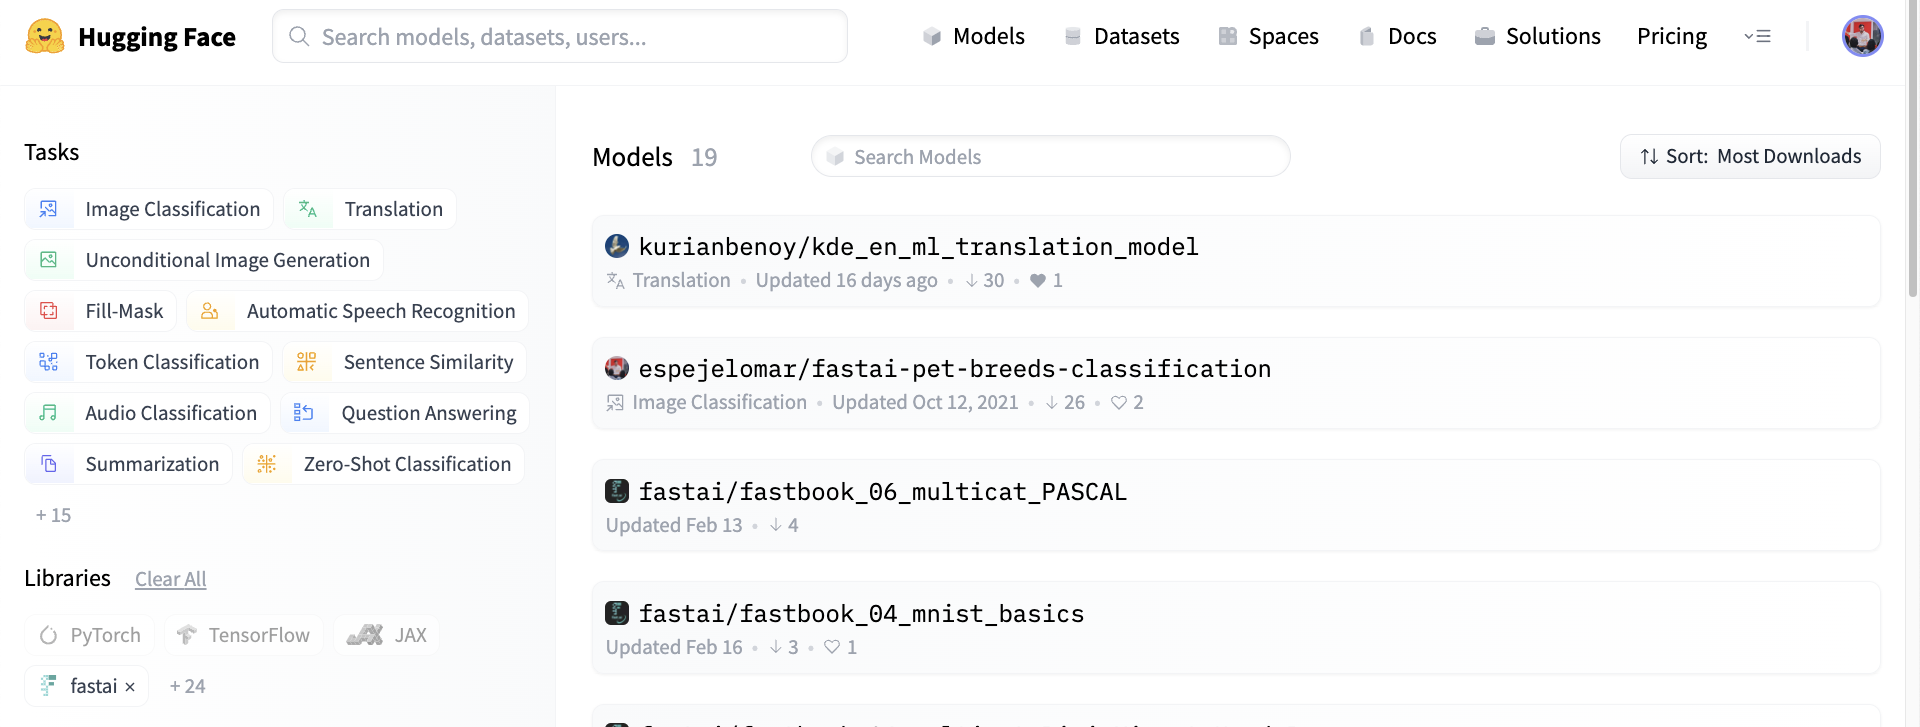

In addition to free model hosting and exposure to the broader community, the Hub has built-in [version control based on git](https://huggingface.co/docs/transformers/model_sharing#repository-features) (git-lfs, for large files) and [model cards](https://huggingface.co/docs/hub/model-repos#what-are-model-cards-and-why-are-they-useful) for discoverability and reproducibility. For more information on navigating the Hub, see [this introduction](https://github.com/huggingface/education-toolkit/blob/main/01_huggingface-hub-tour.md).

## Joining Hugging Face and installation

To share models in the Hub, you will need to have a user. Create it on the [Hugging Face website](https://huggingface.co/join).

The `huggingface_hub` library is a lightweight Python client with utility functions to interact with the Hugging Face Hub. To push fastai models to the hub, you need to have some libraries pre-installed (fatai>=2.4, fastcore>=1.3.27 and toml). You can install them automatically by specifying ["fastai"] when installing `huggingface_hub`, and your environment is good to go:


In [1]:
# Installing from main and specifying ["fastai"] to automatically install the relevant packages and versions
%%capture
!pip install huggingface_hub["fastai"]

## 📚 Creating a fastai Learner

Here we train the [first model in the fastbook](https://github.com/fastai/fastbook/blob/master/01_intro.ipynb) to identify cats 🐱. We fully recommended reading the entire fastbook.

In [2]:
import fastai; 
print(f" We are using fastai version {fastai.__version__}")

 We are using fastai version 2.6.3


In [3]:
# Training of 6 lines in chapter 1 of the fastbook.
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.171164,0.016986,0.004736,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.067651,0.018260,0.006766,01:15


## Sharing a `Learner` to the Hub

A [`Learner` is a fastai object](https://docs.fast.ai/learner.html#Learner) that bundles a model, data loaders, and a loss function. We will use the words `Learner` and Model interchangeably throughout this post.

First, log in to the Hugging Face Hub. You will need to create a `write` token in your [Account Settings](http://hf.co/settings/tokens). Then there are three options to log in:

1. Type `huggingface-cli login` in your terminal and enter your token.

2. If in a python notebook, you can use `notebook_login`.


In [4]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


3. Use the `token` argument of the `push_to_hub_fastai` function.

You can input `push_to_hub_fastai` with the `Learner` you want to upload and the repository id for the Hub in the format of "namespace/repo_name". The namespace can be an individual account or an organization you have write access to (for example, 'fastai/stanza-de'). For more details, refer to the [Hub Client documentation](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/mixins#huggingface_hub.push_to_hub_fastai).

In [5]:
from huggingface_hub import push_to_hub_fastai

# repo_id = "YOUR_USERNAME/YOUR_LEARNER_NAME"
repo_id = "espejelomar/identify-my-cat"

push_to_hub_fastai(learner=learn, repo_id=repo_id)

Cloning https://huggingface.co/espejelomar/identify-my-cat into local empty directory.


Download file model.pkl:   0%|          | 3.48k/83.5M [00:00<?, ?B/s]

Clean file model.pkl:   0%|          | 1.00k/83.5M [00:00<?, ?B/s]

Upload file model.pkl:   0%|          | 3.34k/83.5M [00:00<?, ?B/s]

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/espejelomar/identify-my-cat
   de72b4b..ffd4fbc  main -> main



'https://huggingface.co/espejelomar/identify-my-cat/commit/ffd4fbc533d420bdf066470c70b5764287f5334a'

The `Learner` is now in the Hub in the repo named [`espejelomar/identify-my-cat`](https://huggingface.co/espejelomar/identify-my-cat). An automatic model card is created with some links and next steps. When uploading a fastai `Learner` (or any other model) to the Hub, it is helpful to edit its model card (image below) so that others better understand your work (refer to the [Hugging Face documentation](https://huggingface.co/docs/hub/model-repos#what-are-model-cards-and-why-are-they-useful)).




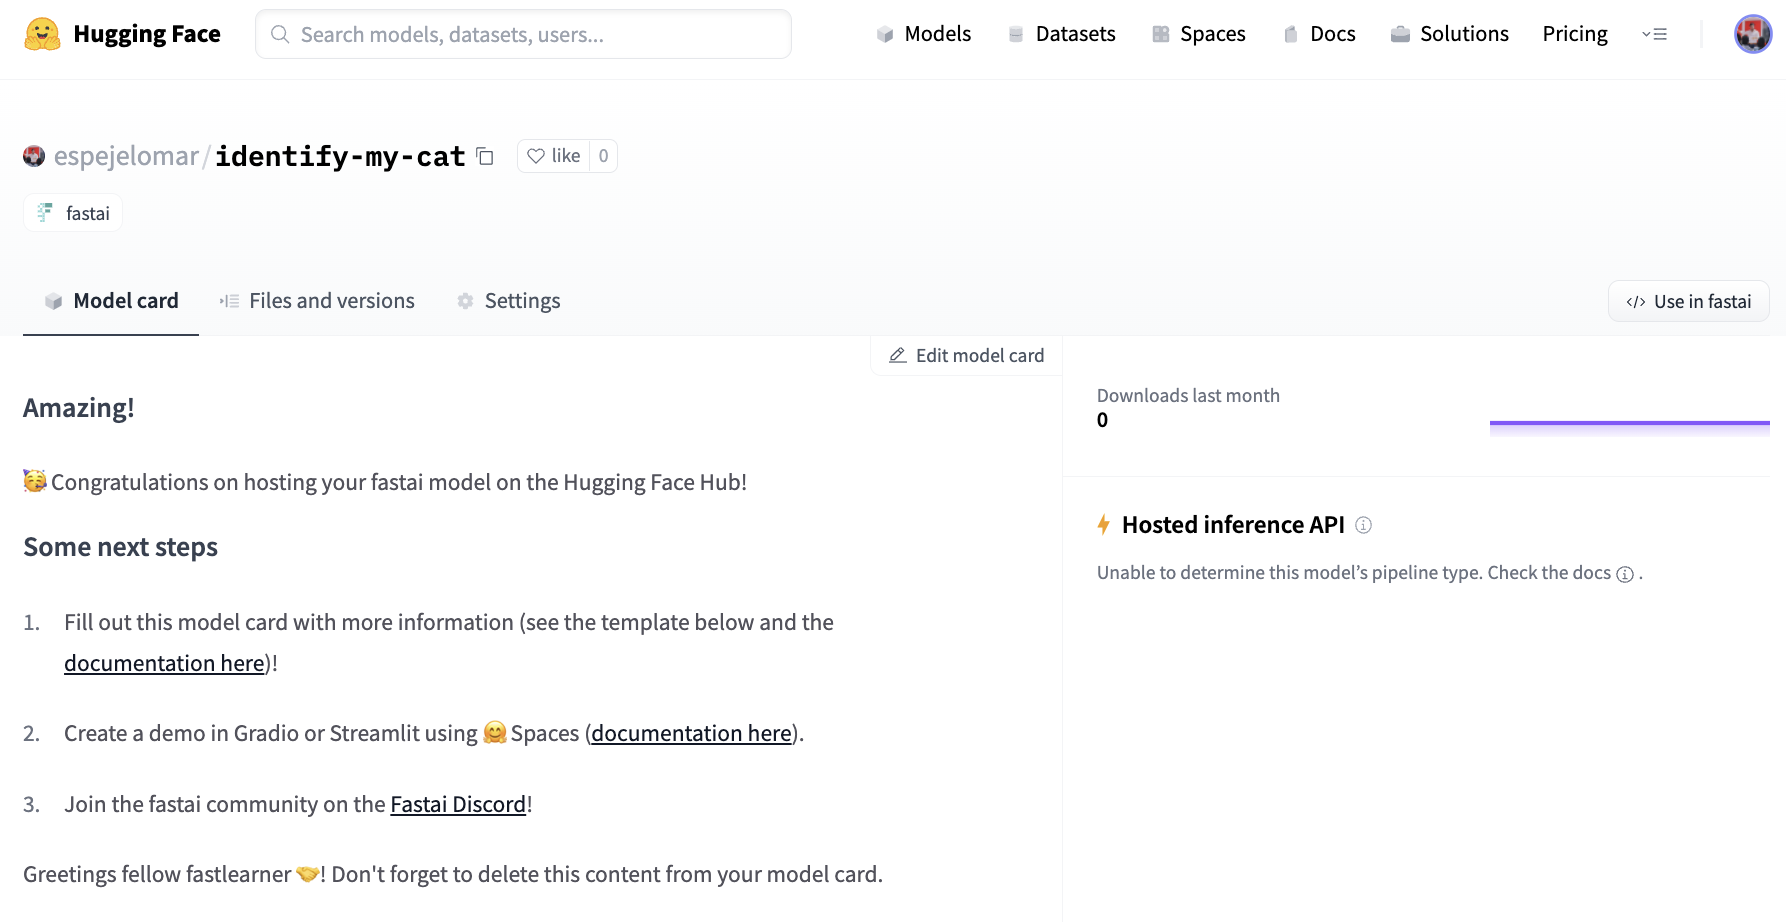

if you want to learn more about `push_to_hub_fastai` just run `help(push_to_hub_fastai)` in your Colab notebook or go to the [Hub Client Documentation](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/mixins#huggingface_hub.from_pretrained_fastai). There are some cool arguments you might be interested in 👀. Remember, your model is a [Git repository](https://huggingface.co/docs/transformers/model_sharing#repository-features) with all the advantages that this entails: version control, commits, branches...

## Loading a Learner from the Hugging Face Hub

Loading a model from the Hub is even simpler. We will load our `Learner`, "espejelomar/identify-my-cat", and test it with a cat image (🦮?). This code is adapted from
the [first chapter of the fastbook](https://github.com/fastai/fastbook/blob/master/01_intro.ipynb).

First, upload an image of a cat (or possibly a dog?) using `ipywidgets`.


In [6]:
%%capture
!pip install ipywidgets

In [7]:
from ipywidgets import widgets

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

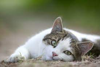

In [8]:
## This is your image:
img = PILImage.create(uploader.data[0])
img.to_thumb(100)

Now let's load the `Learner` we just shared in the Hub and test it. This time we call it `learner` instead of `learn`.

In [9]:
from huggingface_hub import from_pretrained_fastai

# repo_id = "YOUR_USERNAME/YOUR_LEARNER_NAME"
repo_id = "espejelomar/identify-my-cat"

learner = from_pretrained_fastai(repo_id)

It works 👇!

In [11]:
_,_,probs = learner.predict(img)
print(f"Probability it is a cat: {100*probs[1].item():.2f}%")

Probability it is a cat: 100.00%


The [Hub Client documentation](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/mixins#huggingface_hub.from_pretrained_fastai) includes addtional details on `from_pretrained_fastai`.


## `Blurr` to mix fastai and Hugging Face Transformers (and share them)!

> [Blurr is] a library designed for fastai developers who want to train and deploy Hugging Face transformers - [Blurr Docs](https://github.com/ohmeow/blurr).

We will:
1. Train a `blurr` Learner with the [high-level Blurr API](https://github.com/ohmeow/blurr#using-the-high-level-blurr-api). It will load the `distilbert-base-uncased` model from the Hugging Face Hub and prepare a sequence classification model.
2. Share it to the Hub with the namespace `fastai/blurr_IMDB_distilbert_classification` using `push_to_hub_fastai`.
3. Load it with `from_pretrained_fastai` and try it with `learner_blurr.predict()`.

Collaboration and open-source are fantastic!

First, install `blurr` and train the Learner.

In [12]:
%%capture
!git clone https://github.com/ohmeow/blurr.git
%cd blurr
!pip install -e ".[dev]"

In [14]:
import torch
import transformers
from fastai.text.all import *

from blurr.text.data.all import *
from blurr.text.modeling.all import *

path = untar_data(URLs.IMDB_SAMPLE)
model_path = Path("models")
imdb_df = pd.read_csv(path / "texts.csv")

learn_blurr = BlearnerForSequenceClassification.from_data(imdb_df, "distilbert-base-uncased", dl_kwargs={"bs": 4})
learn_blurr.fit_one_cycle(1, lr_max=1e-3)

Use `push_to_hub_fastai` to share with the Hub.

In [16]:
from huggingface_hub import push_to_hub_fastai

# repo_id = "YOUR_USERNAME/YOUR_LEARNER_NAME"
repo_id = "fastai/blurr_IMDB_distilbert_classification"

push_to_hub_fastai(learn_blurr, repo_id)

Cloning https://huggingface.co/fastai/blurr_IMDB_distilbert_classification into local empty directory.


Download file model.pkl:   0%|          | 1.58k/256M [00:00<?, ?B/s]

Clean file model.pkl:   0%|          | 1.00k/256M [00:00<?, ?B/s]

Upload file model.pkl:   0%|          | 3.34k/256M [00:00<?, ?B/s]

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/fastai/blurr_IMDB_distilbert_classification
   0e8868a..ca19655  main -> main



'https://huggingface.co/fastai/blurr_IMDB_distilbert_classification/commit/ca196553dcea43641389db9dc43ccfbdd4f5c4af'

Use `from_pretrained_fastai` to load a `blurr` model from the Hub.

In [17]:
from huggingface_hub import from_pretrained_fastai

# repo_id = "YOUR_USERNAME/YOUR_LEARNER_NAME"
repo_id = "fastai/blurr_IMDB_distilbert_classification"

learner_blurr = from_pretrained_fastai(repo_id)

Try it with a couple sentences and review their sentiment (negative or positive) with `learner_blurr.predict()`.

In [43]:
sentences = ["This integration is amazing!",
             "I hate this was not available before."]

probs = learner_blurr.predict(sentences)

print(f"Probability that sentence '{sentences[0]}' is negative is: {100*probs[0]['probs'][0]:.2f}%")
print(f"Probability that sentence '{sentences[1]}' is negative is: {100*probs[1]['probs'][0]:.2f}%")

Probability that sentence 'This integration is amazing!' is negative is: 29.46%
Probability that sentence 'I hate this was not available before.' is negative is: 70.04%


## What's next?

Take the [fast.ai course](https://course.fast.ai/) (a new version is coming soon), follow [Jeremy Howard](https://twitter.com/jeremyphoward?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) and [fast.ai](https://twitter.com/FastDotAI) on Twitter for updates, and start sharing your fastai models on the Hub 🤗. Or load one of the [models that are already in the Hub](https://huggingface.co/models?library=fastai&sort=downloads).

📧 Feel free to contact us via the [Hugging Face Discord](https://discord.gg/YRAq8fMnUG) and share if you have an idea for a project. We would love to hear your feedback 💖.



### Would you like to integrate your library to the Hub?

This integration is made possible by the [`huggingface_hub`](https://github.com/huggingface/huggingface_hub) library. If you want to add your library to the Hub, we have a [guide](https://huggingface.co/docs/hub/adding-a-library) for you! Or simply tag someone from the Hugging Face team.

A shout out to the Hugging Face team for all the work on this integration, in particular [@osanseviero](https://twitter.com/osanseviero) 🦙.

Thank you fastlearners and hugging learners 🤗. 